In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 데이터 읽기
beer = pd.read_csv("c:/data/mva/beerbrand.csv", index_col='name')
beer.head()

,calories,sodium,alcohol,cost
name,,,,
BUDWEISER,144,15,4.7,0.43
SCHLITZ,151,19,4.9,0.43
LOWENBRAU,157,15,4.9,0.48
KRONENBOURG,170,7,5.2,0.73
HEINEKEN,152,11,5.0,0.77


In [2]:
# 기술통계량 구하기
beer.describe()

,calories,sodium,alcohol,cost
count,20.000000,20.000000,20.000000,20.000000
mean,132.400000,14.950000,4.440000,0.496500
std,30.257491,6.581273,0.759778,0.143757
min,68.000000,6.000000,2.300000,0.280000
25%,110.250000,9.500000,4.200000,0.430000
50%,144.000000,15.000000,4.650000,0.440000
75%,150.250000,19.000000,4.900000,0.485000
max,175.000000,27.000000,5.500000,0.790000


In [6]:
# 표준화 패키기 불러오기
from sklearn.preprocessing import StandardScaler
# 자료 표준화
zbeer = StandardScaler().fit_transform(beer)
type(zbeer)

numpy.ndarray

In [7]:
# 평균이 0, 분산이 1임을 확인
zbeer_frame = pd.DataFrame(zbeer)
zbeer_frame.columns = beer.columns
zbeer_frame.describe()

,calories,sodium,alcohol,cost
count,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01
mean,-1.110223e-16,7.771561e-17,-1.634803e-15,-3.747003e-16
std,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00
min,-2.183691e+00,-1.395248e+00,-2.889782e+00,-1.545138e+00
25%,-7.510676e-01,-8.496201e-01,-3.240877e-01,-4.746037e-01
50%,3.933356e-01,7.794680e-03,2.835767e-01,-4.032347e-01
75%,6.052621e-01,6.313691e-01,6.211680e-01,-8.207432e-02
max,1.444491e+00,1.878518e+00,1.431387e+00,2.094679e+00


In [8]:
# 패키지 불러오기
import scipy.cluster.hierarchy as sch
# 계층적 군집분석: 최단연결법
slink = sch.linkage(zbeer, 'single')
# method = 'single', 'complete', 'average', 'median', 'ward'

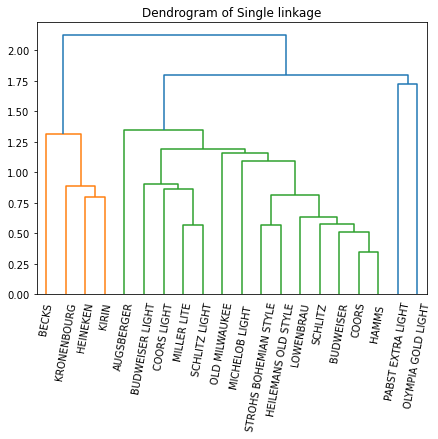

In [9]:
# 덴드로그램 그리기
plt.figure(figsize=(7,5))
sch.dendrogram(slink,  leaf_rotation=80,  leaf_font_size=10,  labels = beer.index)
plt.title("Dendrogram of Single linkage")
plt.show()

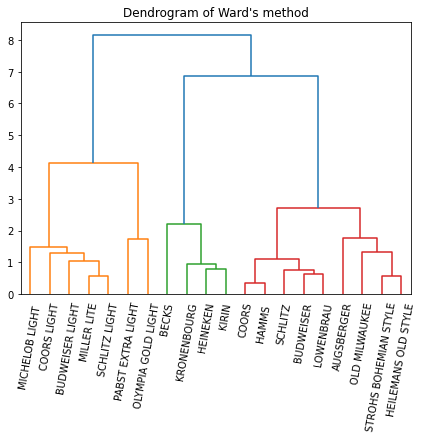

In [10]:
# 계층적 군집분석: 와드의 방법
wlink = sch.linkage(zbeer, 'ward')
plt.figure(figsize=(7,5))
sch.dendrogram(wlink,  leaf_rotation=80,  leaf_font_size=10,  labels=beer.index )
plt.title("Dendrogram of Ward's method")
plt.show()

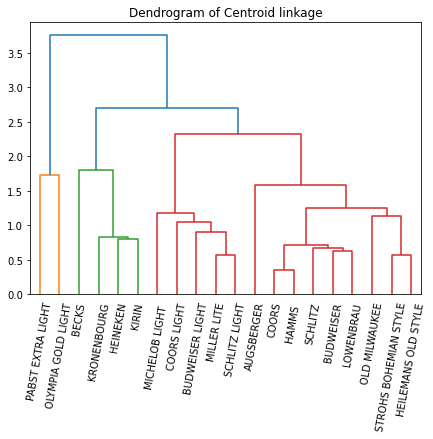

In [11]:
# 계층적 군집분석: 중심연결법
clink = sch.linkage(zbeer, 'centroid')
plt.figure(figsize=(7,5))
sch.dendrogram(clink,  leaf_rotation=80,  leaf_font_size=10,  labels = beer.index )
plt.title("Dendrogram of Centroid linkage")
plt.show() 

In [12]:
# 소속 군집 알기
from sklearn.cluster import AgglomerativeClustering
# help(AgglomerativeClustering): 클래스 코드 보기
# 계층적 군집분석: ward 방법
wcluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
# linkage: {"ward", "complete", "average", "single"}, default는 "ward"
# 소속군집
member = wcluster.fit_predict(zbeer)
member

array([0, 0, 0, 2, 2, 0, 0, 0, 3, 3, 0, 3, 3, 2, 2, 1, 0, 0, 1, 3],
      dtype=int64)

In [13]:
# 군집별 평균계산
member1 = pd.DataFrame(member, columns=['cluster'], index=beer.index)
data_combined = beer.join(member1)
data_combined.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,149.00,20.444444,4.800,0.415556
1,70.00,10.500000,2.600,0.420000
2,155.25,10.750000,4.975,0.762500
3,109.20,10.200000,4.100,0.460000


In [14]:
# 비계층적 군집분석: K-means 군집분석
from sklearn.cluster import KMeans
# k-평균 군집분석: 군집수 = 2
kmc = KMeans(n_clusters=2)
kmc.fit(zbeer)

KMeans(n_clusters=2)

In [15]:
# 군집 중심 알기
kmc.cluster_centers_

array([[ 0.58951901,  0.31958187,  0.49577698,  0.17281486],
       [-1.37554436, -0.74569103, -1.15681296, -0.40323468]])

In [16]:
# 소속군집 알기
kmc.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1])

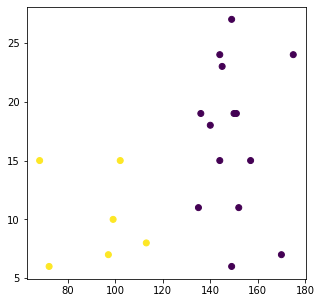

In [17]:
# 소속 군집 산점도
plt.figure(figsize=(5,5))
plt.scatter(x=beer['calories'], y=beer['sodium'], c=kmc.labels_)
plt.show()